# Katrina Multiple

In [7]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt
import adcircpy
from adcircpy.outputs import (
    Maxele,
    MaximumElevationTimes,
    Fort63,
    Fort61,
    Minpr,
    Maxwvel,
    Maxvel,
)
from sithom.plot import plot_defaults
from sithom.plot import get_dim, label_subplots
from src.constants import KAT_EX_PATH, NO_BBOX, DATA_PATH

plot_defaults()

In [9]:
from src.models.generation import mult_folder_name

In [10]:
NO_BBOX.lon

[-92, -86.5]

In [11]:
NO_BBOX.lat

[28.5, 30.8]

In [24]:
@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )


def min_index(values):
    return (values).argmin()

Text(0.5, 0, 'Katrina windspeed multiple [dimensionless]')

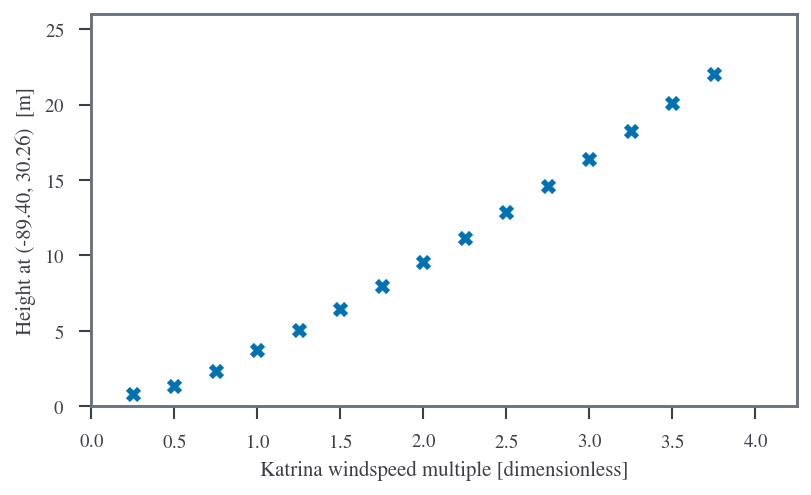

In [30]:
plot_defaults()
height_list = []
mult_list = sorted(
    [x / 4 for x in range(16) if x not in list(range(0, 16, 4))]
    + [x for x in range(1, 4)]
)
# [1, 2, 3, 4]

for i in mult_list:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    # print(maxele.values.shape)
    # print(maxele.x.shape)
    # print(maxele.y.shape)
    # print(maxele.triangles.shape)
    indices = indices_in_bbox(maxele.x, maxele.y)
    # print(maxele.values[indices].shape)
    index = (-maxele.values[indices]).argmin()
    index = 27
    # print(index)
    height_list.append(maxele.values[indices][index])
    # print("maxele", maxele.values[indices][index])
    # print("x", maxele.x[indices][index])
    # print("y", maxele.y[indices][index])

plt.scatter(mult_list, height_list)
plt.ylabel("Height at (-89.40, 30.26)  [m]")
plt.xlim([0, 4.25])
plt.ylim([0, 26])
plt.xlabel("Katrina windspeed multiple [dimensionless]")

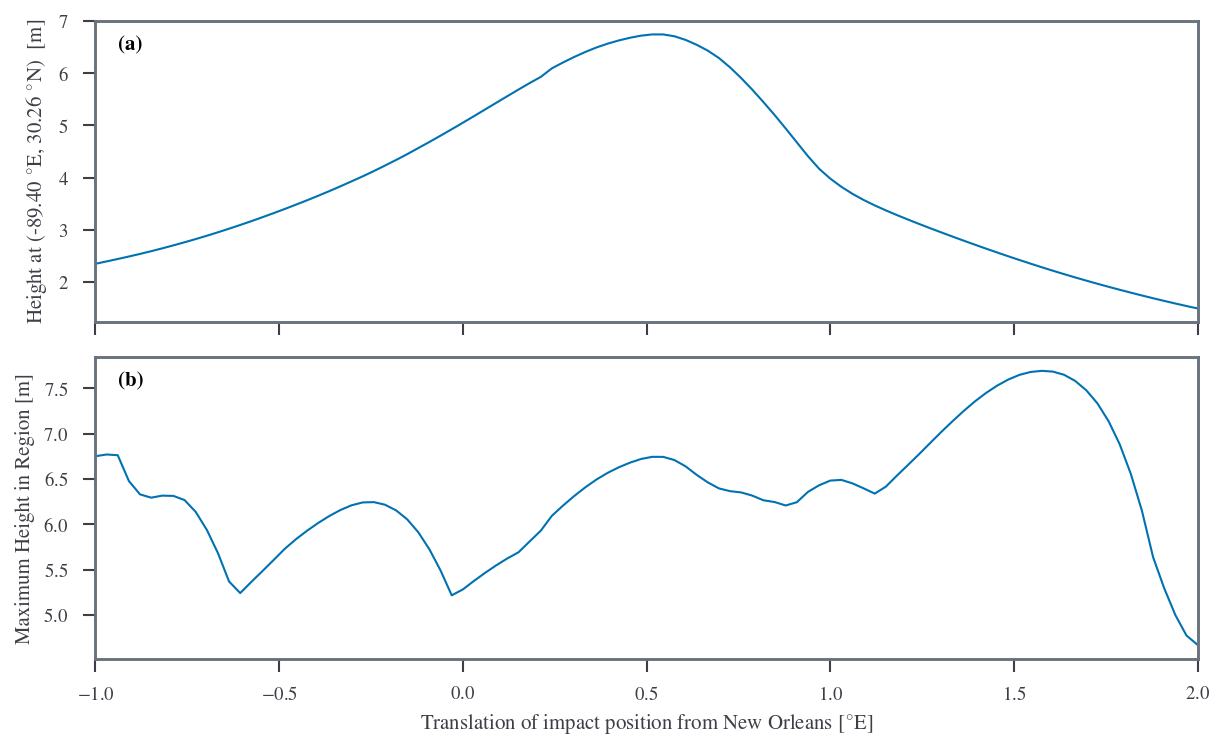

In [40]:
plot_defaults()
height_set_list = []
height_var_list = []
x_diff_list = np.linspace(-1, 2, num=100)
main_folder = os.path.join(DATA_PATH, "kat_move")

for x_diff in x_diff_list:
    folder = os.path.join(main_folder, "x{:.3f}".format(x_diff) + "_kat_move")
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    # print(maxele.values.shape)
    # print(maxele.x.shape)
    # print(maxele.y.shape)
    # print(maxele.triangles.shape)
    indices = indices_in_bbox(maxele.x, maxele.y)
    # print(maxele.values[indices].shape)
    index_var = (-maxele.values[indices]).argmin()
    index_set = 27
    # print(index)
    height_set_list.append(maxele.values[indices][index_set])
    height_var_list.append(maxele.values[indices][index_var])
    # print("maxele", maxele.values[indices][index])
    # print("x", maxele.x[indices][index])
    # print("y", maxele.y[indices][index])

from sithom.plot import get_dim

fig, axs = plt.subplots(2, 1, sharex=True, figsize=get_dim(fraction_of_line_width=1.5))

axs[0].plot(x_diff_list, height_set_list)
axs[0].set_ylabel("Height at (-89.40 $^{\circ}$E, 30.26 $^{\circ}$N)  [m]")
axs[0].set_xlim([-1, 2])
# plt.ylim([0, 26])

axs[1].plot(x_diff_list, height_var_list)
axs[1].set_ylabel("Maximum Height in Region [m]")
axs[1].set_xlim([-1, 2])
# plt.ylim([0, 26])
axs[1].set_xlabel("Translation of impact position from New Orleans [$^{\circ}$E]")

from sithom.plot import label_subplots

label_subplots(axs)

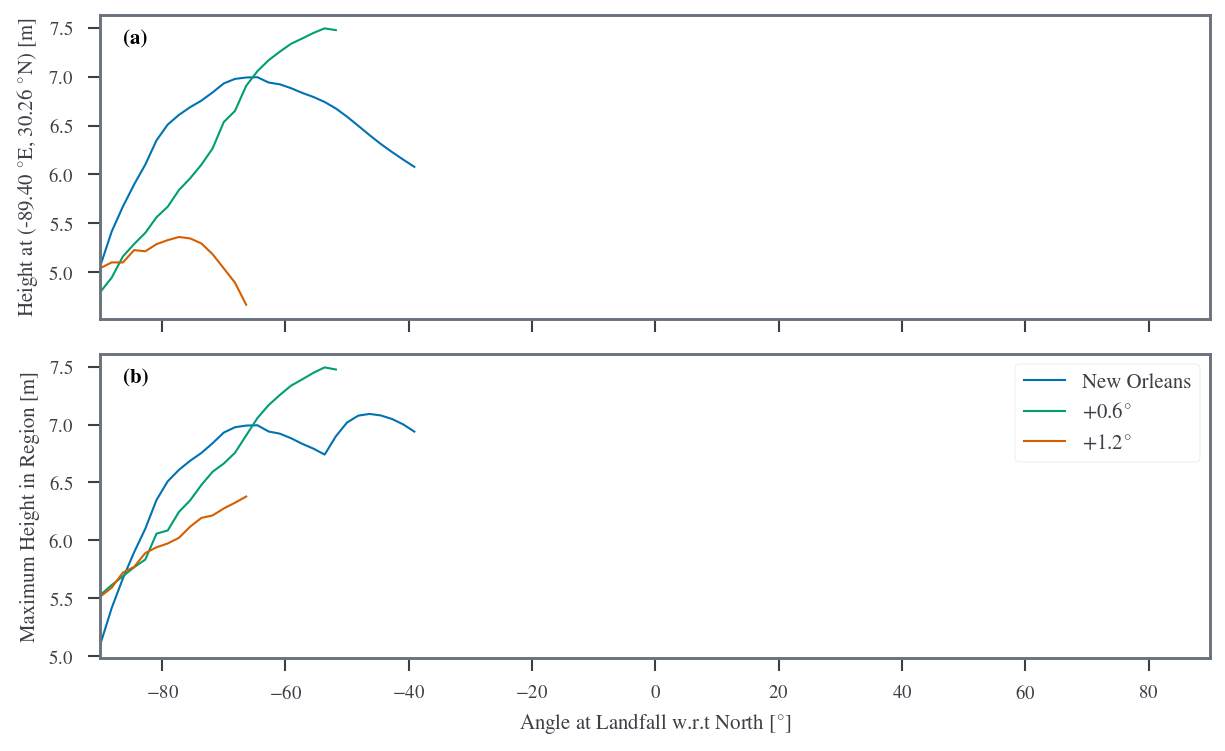

In [57]:
from typing import Tuple, List

plot_defaults()
angle_list = np.linspace(-90, 90, num=100)
main_folder = os.path.join(DATA_PATH, "kat_angle")


def get(prefix="a") -> Tuple[List[float], List[float], List[float]]:
    height_set_list = []
    height_var_list = []
    working_angle_list = []
    for angle in angle_list:
        folder = os.path.join(
            main_folder, prefix + "{:.3f}".format(angle) + "_kat_angle"
        )
        if os.path.exists(folder):
            path = os.path.join(folder, "maxele.63.nc")
            if os.path.exists(path):
                maxele = Maxele(path, crs="EPSG:4326")
                indices = indices_in_bbox(maxele.x, maxele.y)
                index_var = (-maxele.values[indices]).argmin()
                index_set = 27
                height_set_list.append(maxele.values[indices][index_set])
                height_var_list.append(maxele.values[indices][index_var])
                working_angle_list.append(angle)
    return working_angle_list, height_set_list, height_var_list


fig, axs = plt.subplots(2, 1, sharex=True, figsize=get_dim(fraction_of_line_width=1.5))
axs[0].set_ylabel("Height at (-89.40 $^{\circ}$E, 30.26 $^{\circ}$N) [m]")
axs[1].set_ylabel("Maximum Height in Region [m]")
axs[1].set_xlabel("Angle at Landfall w.r.t North [$^{\circ}$]")
axs[0].set_xlim([-90, 90])
label_subplots(axs)

for prefix, label in [
    ("a", "New Orleans"),
    ("b", "+0.6$^{\circ}$"),
    ("c", "+1.2$^{\circ}$"),
]:
    al, hsl, hvl = get(prefix=prefix)
    axs[0].plot(al, hsl, label=label)
    axs[1].plot(al, hvl, label=label)


plt.legend()
plt.show()

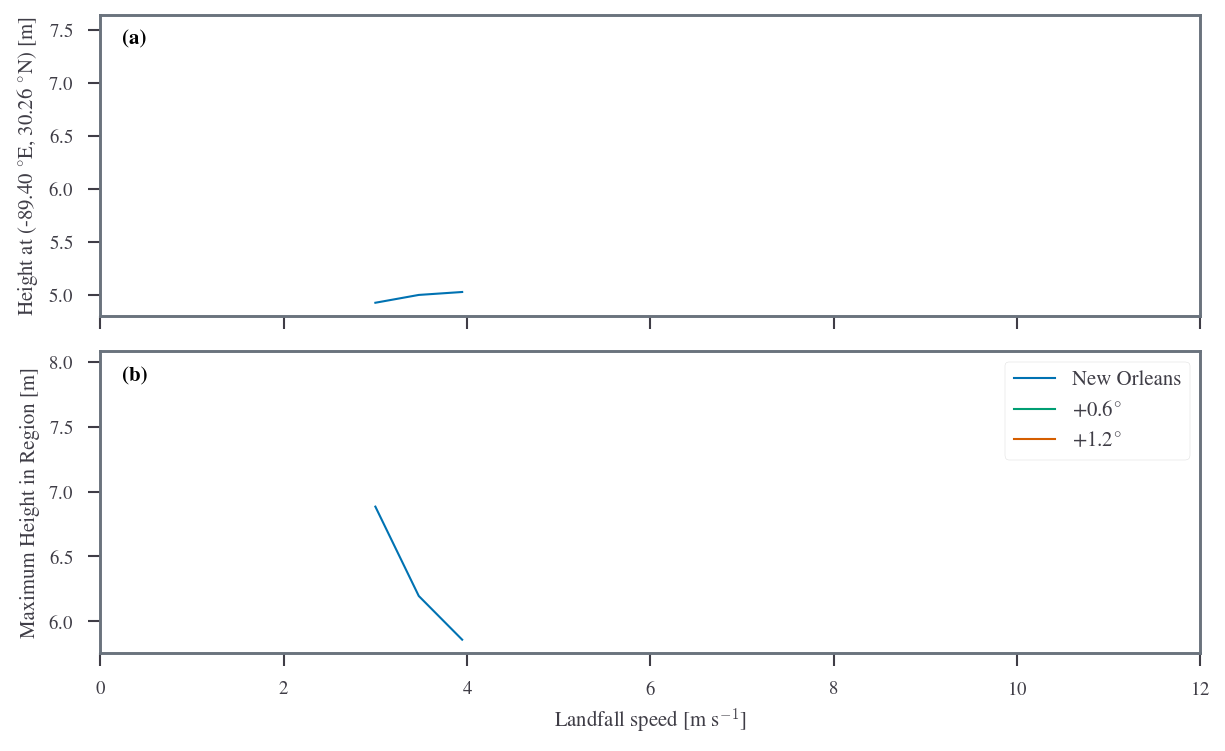

In [55]:
from typing import Tuple, List

plot_defaults()
angle_list = np.linspace(3, 12, num=20)
main_folder = os.path.join(DATA_PATH, "kat_landfall")


def get(prefix="a") -> Tuple[List[float], List[float], List[float]]:
    height_set_list = []
    height_var_list = []
    working_angle_list = []
    for angle in angle_list:
        folder = os.path.join(
            main_folder, prefix + "{:.3f}".format(angle) + "_kat_landfall"
        )
        if os.path.exists(folder):
            path = os.path.join(folder, "maxele.63.nc")
            if os.path.exists(path):
                maxele = Maxele(path, crs="EPSG:4326")
                indices = indices_in_bbox(maxele.x, maxele.y)
                index_var = (-maxele.values[indices]).argmin()
                index_set = 27
                height_set_list.append(maxele.values[indices][index_set])
                height_var_list.append(maxele.values[indices][index_var])
                working_angle_list.append(angle)
    return working_angle_list, height_set_list, height_var_list


fig, axs = plt.subplots(2, 1, sharex=True, figsize=get_dim(fraction_of_line_width=1.5))
axs[0].set_ylabel("Height at (-89.40 $^{\circ}$E, 30.26 $^{\circ}$N) [m]")
axs[1].set_ylabel("Maximum Height in Region [m]")
axs[1].set_xlabel("Landfall speed [m s$^{-1}$]")
axs[0].set_xlim([0, 12])
label_subplots(axs)

for prefix, label in [
    ("a", "New Orleans"),
    ("b", "+0.6$^{\circ}$"),
    ("c", "+1.2$^{\circ}$"),
]:
    al, hsl, hvl = get(prefix=prefix)
    axs[0].plot(al, hsl, label=label)
    axs[1].plot(al, hvl, label=label)

plt.legend()
plt.show()

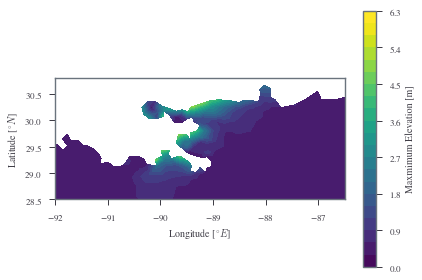

<Figure size 432x288 with 0 Axes>

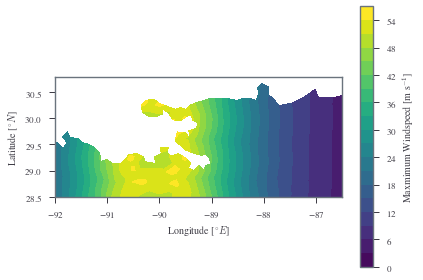

In [18]:
folder = os.path.join(DATA_PATH, "kat_h80")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

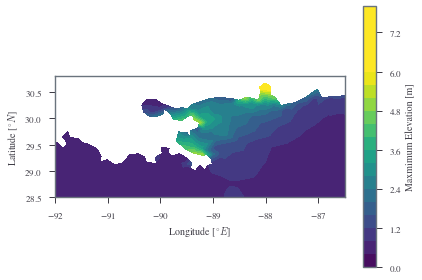

<Figure size 432x288 with 0 Axes>

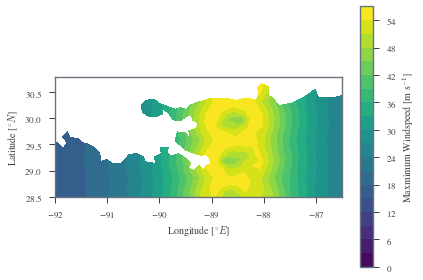

In [19]:
folder = os.path.join(DATA_PATH, "katd_h08")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

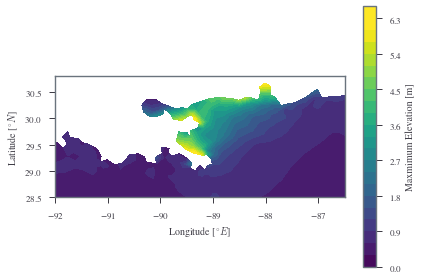

<Figure size 432x288 with 0 Axes>

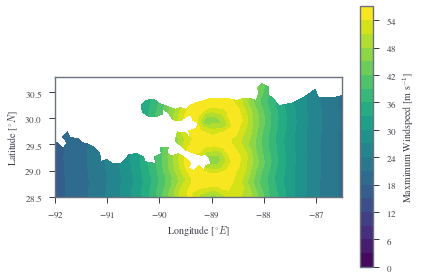

In [20]:
folder = os.path.join(DATA_PATH, "kate_h08")
path = os.path.join(folder, "maxele.63.nc")
maxele = Maxele(path, crs="EPSG:4326")
maxele.tricontourf(cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6)
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()
plt.clf()
path = os.path.join(folder, "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

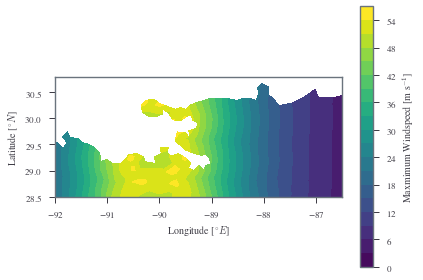

In [14]:
path = os.path.join(DATA_PATH, "kat_h80", "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

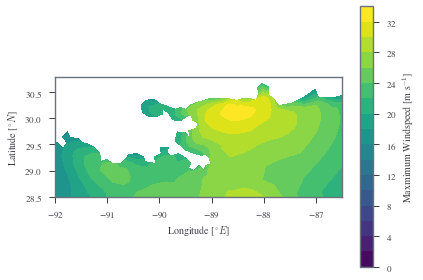

In [15]:
path = os.path.join(DATA_PATH, "mult1", "maxwvel.63.nc")
maxwvel = Maxwvel(path, crs="EPSG:4326")
maxwvel.tricontourf(cbar=True, levels=20, label="Maxmimum Windspeed [m s$^{-1}$]")
NO_BBOX.ax_lim(plt.gca())
plt.xlabel("Longitude [$^{\circ}E$]")
plt.ylabel("Latitude [$^{\circ}N$]")
plt.show()

In [ ]:
from src.constants import NEW_ORLEANS
from sithom.place import Point

point = Point(NEW_ORLEANS.lon + 1.5, NEW_ORLEANS.lat)

In [ ]:
point

[('Latitude', 29.9511, 'degrees_north'), ('Longitude', -88.5715, 'degrees_east'), 'NONE']

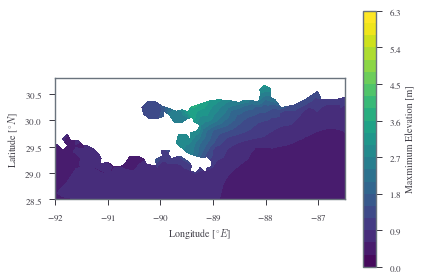

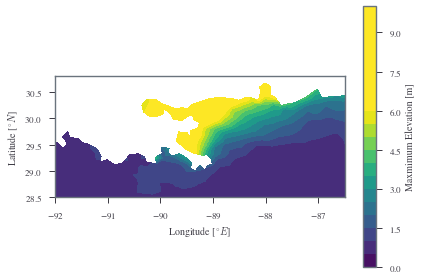

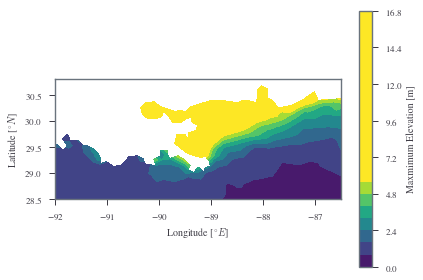

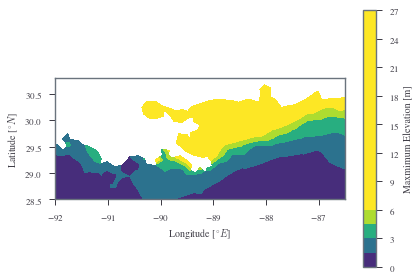

In [ ]:
for i in [1, 2, 3, 4]:
    folder = mult_folder_name(i)
    path = os.path.join(folder, "maxele.63.nc")
    maxele = Maxele(path, crs="EPSG:4326")
    maxele.tricontourf(
        cbar=True, levels=20, label="Maxmimum Elevation [m]", vmin=0, vmax=6
    )
    NO_BBOX.ax_lim(plt.gca())
    plt.xlabel("Longitude [$^{\circ}E$]")
    plt.ylabel("Latitude [$^{\circ}N$]")
    plt.show()

In [ ]:
sorted(
    [x / 4 for x in range(16) if x not in list(range(0, 16, 4))]
    + [x for x in range(1, 4)]
)

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75]